In [1]:
import pandas as pd
import gensim
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import requests
%matplotlib inline

In [99]:
response = requests.get('https://raw.githubusercontent.com/stopwords-iso/stopwords-en/master/stopwords-en.txt')
stopwords = response.text.split('\n')
stopwords.append("'s")
stopwords.append('_')

In [100]:
dorian_gray_tokens_df = pd.read_csv('../data/DorianGray/character-tagging/DorianGray.tokens', delimiter='\t')
christmas_carol_tokens_df = pd.read_csv('../data/ChristmasCarol/character-tagging/ChristmasCarol.tokens', delimiter='\t')
pride_and_prejudice_tokens_df = pd.read_csv('../data/PrideAndPredjudice/character-tagging/PrideAndPredjudice.tokens', delimiter='\t')
silas_marner_tokens_df = pd.read_csv('../data/SilasMarner/character-tagging/SilasMarner.tokens', delimiter='\t')

dorian_gray_tokens_df

,paragraph_ID,sentence_ID,token_ID_within_sentence,token_ID_within_document,word,lemma,byte_onset,byte_offset,POS_tag,fine_POS_tag,dependency_relation,syntactic_head_ID,event
0,0,0,0,0,The,the,0,3,DET,DT,det,1,O
1,0,0,1,1,studio,studio,4,10,NOUN,NN,nsubjpass,3,O
2,0,0,2,2,was,be,11,14,AUX,VBD,auxpass,3,O
3,0,0,3,3,filled,fill,15,21,VERB,VBN,ROOT,3,O
4,0,0,4,4,with,with,22,26,ADP,IN,prep,3,O
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96039,1490,6159,11,96039,recognized,recognize,426538,426548,VERB,VBD,relcl,96036,O
96040,1490,6159,12,96040,who,who,426549,426552,PRON,WP,attr,96042,O
96041,1490,6159,13,96041,it,it,426553,426555,PRON,PRP,nsubj,96042,O
96042,1490,6159,14,96042,was,be,426556,426559,AUX,VBD,ccomp,96039,O


In [101]:
def build_sentences(tokens_df):
    sentences = []
    for _, sentence_df in tokens_df.groupby(['paragraph_ID']):
        this_sentence = []
        for _, token_row in sentence_df.iterrows():
            if token_row.POS_tag != 'PUNCT' and token_row.POS_tag != 'PROPN' and token_row.lemma.lower().strip() not in stopwords and not all(char.isdigit() for char in token_row.lemma.strip()):
                this_sentence.append(token_row.lemma)
        sentences.append(this_sentence)
    return sentences

dorian_gray_sentences = build_sentences(dorian_gray_tokens_df)
christmas_carol_sentences = build_sentences(christmas_carol_tokens_df)
pride_and_prejudice_sentences = build_sentences(pride_and_prejudice_tokens_df)
silas_marner_sentences = build_sentences(silas_marner_tokens_df)

full_corpus_sentences = dorian_gray_sentences + christmas_carol_sentences + pride_and_prejudice_sentences + silas_marner_sentences

In [102]:
dorian_gray_id2word = gensim.corpora.Dictionary(dorian_gray_sentences)
christmas_carol_id2word = gensim.corpora.Dictionary(christmas_carol_sentences)  
pride_and_prejudice_id2word = gensim.corpora.Dictionary(pride_and_prejudice_sentences)  
silas_marner_id2word = gensim.corpora.Dictionary(silas_marner_sentences)  
full_corpus_id2word = gensim.corpora.Dictionary(full_corpus_sentences)


dorian_gray_corpus = [dorian_gray_id2word.doc2bow(text) for text in dorian_gray_sentences]
christmas_carol_corpus = [christmas_carol_id2word.doc2bow(text) for text in christmas_carol_sentences]
pride_and_prejudice_corpus = [pride_and_prejudice_id2word.doc2bow(text) for text in pride_and_prejudice_sentences]
silas_marner_corpus = [silas_marner_id2word.doc2bow(text) for text in silas_marner_sentences]
full_corpus_corpus = [full_corpus_id2word.doc2bow(text) for text in full_corpus_sentences]

In [103]:
lda_model_dorian_gray = gensim.models.ldamodel.LdaModel(corpus=dorian_gray_corpus,
                                           id2word=dorian_gray_id2word,
                                           num_topics=15, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

lda_model_full_corpus = gensim.models.ldamodel.LdaModel(corpus=full_corpus_corpus,
                                           id2word=full_corpus_id2word,
                                           num_topics=100, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [104]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_full_corpus, full_corpus_corpus, full_corpus_id2word, mds='mmds')
vis

C:\Users\decla\.conda\envs\dissertation2\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
41     0.020918  0.530140       1        1  6.027115
83     0.393690  0.342983       2        1  4.723137
33    -0.260289  0.454879       3        1  4.385057
84    -0.059148  0.471569       4        1  3.835693
15     0.477796 -0.153036       5        1  3.741332
...         ...       ...     ...      ...       ...
38     0.012259 -0.013593      96        1  0.029186
20     0.012259 -0.013593      97        1  0.029186
72     0.012259 -0.013593      98        1  0.029186
1      0.012259 -0.013593      99        1  0.029186
40     0.012259 -0.013593     100        1  0.029186

[100 rows x 5 columns], topic_info=       Term         Freq        Total  Category  logprob  loglift
104    time  1756.000000  1756.000000   Default  30.0000  30.0000
183    feel  1357.000000  1357.000000   Default  29.0000  29.0000
222    hand   819.000000   819.000000   Default  28.0000  28.0000
563     day   956.000000   956.000000   Default  27.0000  27.0000
257    life  1080.000000  1080.000000   Default  26.0000  26.0000
..      ...          ...          ...       ...      ...      ...
21   beauty     0.002469   155.652566  Topic100  -9.1272  -2.9122
23     bird     0.002469    61.891400  Topic100  -9.1272  -1.9899
26   branch     0.002469    15.586947  Topic100  -9.1272  -0.6110
27   burden     0.002469    54.777770  Topic100  -9.1272  -1.8678
28    catch     0.002469   111.588713  Topic100  -9.1272  -2.5794

[4746 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
166      27  0.986969  absolutely
267       4  0.934592      absurd
314      33  0.967656    accident
639       3  0.993611     account
306      21  0.992599      afraid
...     ...       ...         ...
784       8  0.979843     worship
246      47  0.951668       worth
807      25  0.995361       write
293      31  0.994301       wrong
785       8  0.975320       youth

[441 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[42, 84, 34, 85, 16, 53, 14, 37, 69, 82, 72, 59, 83, 100, 90, 78, 40, 29, 50, 10, 30, 56, 46, 88, 26, 68, 13, 87, 99, 36, 79, 9, 80, 25, 20, 44, 65, 66, 19, 51, 61, 35, 27, 64, 28, 52, 8, 1, 71, 70, 18, 74, 48, 47, 33, 5, 15, 81, 12, 11, 43, 7, 86, 6, 4, 89, 91, 92, 93, 94, 95, 96, 97, 98, 3, 17, 75, 77, 63, 49, 32, 54, 55, 31, 57, 58, 60, 62, 45, 76, 38, 24, 67, 23, 22, 39, 21, 73, 2, 41])

In [105]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_dorian_gray, dorian_gray_corpus, dorian_gray_id2word, mds='mmds')
vis

C:\Users\decla\.conda\envs\dissertation2\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11    -0.340538 -0.289056       1        1  22.061157
6      0.053092 -0.440614       2        1  21.271778
14    -0.401411  0.182367       3        1  16.062151
3      0.295628 -0.228997       4        1  10.823063
8      0.355409  0.032077       5        1   8.807432
0      0.208267  0.207234       6        1   4.217610
2      0.043283  0.275177       7        1   3.021068
12     0.034110 -0.116360       8        1   2.445156
9     -0.154183  0.008895       9        1   2.218162
5     -0.084011 -0.085573      10        1   2.028961
4     -0.079607  0.089259      11        1   1.718097
10    -0.082863  0.193933      12        1   1.667740
1      0.112313  0.041751      13        1   1.485371
7      0.017366  0.014877      14        1   1.130331
13     0.023147  0.115029      15        1   1.041923, topic_info=          Term        Freq       Total Category  logprob  loglift
257       life  364.000000  364.000000  Default  30.0000  30.0000
259       love  170.000000  170.000000  Default  29.0000  29.0000
104       time  208.000000  208.000000  Default  28.0000  28.0000
222       hand  203.000000  203.000000  Default  27.0000  27.0000
134     answer  201.000000  201.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
2406      rest    0.035099    1.077014  Topic15  -8.7496   1.1403
953      nerve    0.035214    1.094964  Topic15  -8.7463   1.1271
2213    thrust    0.035151    1.088488  Topic15  -8.7481   1.1312
2973  evidence    0.035122    1.084510  Topic15  -8.7489   1.1340
1920     cease    0.035123    1.095101  Topic15  -8.7489   1.1243

[547 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
166       2  0.984806  absolutely
314       9  0.885766    accident
498       7  0.920132      accord
464       9  0.679080      admire
306       1  0.850488      afraid
...     ...       ...         ...
210       5  0.093592        word
784       4  0.984491     worship
807       5  0.972865       write
293       5  0.937626       wrong
785       4  0.982043       youth

[382 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 7, 15, 4, 9, 1, 3, 13, 10, 6, 5, 11, 2, 8, 14])

In [106]:
entities_df = pd.read_csv('../data/DorianGray/processed_characters.csv')
tokens_df = pd.read_csv('../data/DorianGray/character-tagging/DorianGray.tokens', delimiter='\t')
entities_df

,Unnamed: 0,COREF,start_token,end_token,prop,cat,text,orig_coref,character_name
0,4,112,77,79,PROP,PER,Lord Henry Wotton,112.0,Lord Henry Wotton
1,6,112,156,156,PRON,PER,him,112.0,Lord Henry Wotton
2,14,113,289,290,PROP,PER,Basil Hallward,112.0,Basil Hallward
3,27,113,396,396,PROP,PER,Basil,113.0,Basil Hallward
4,29,112,408,409,PROP,PER,Lord Henry,113.0,Lord Henry Wotton
...,...,...,...,...,...,...,...,...,...
7166,14196,307,95668,95668,PRON,PER,he,NaN,Alan Campbell
7167,14197,307,95674,95674,PRON,PER,He,NaN,Alan Campbell
7168,14215,115,95814,95816,PROP,PER,Mr. Dorian Gray,NaN,Mr. Dorian Gray
7169,14232,268,95885,95885,PROP,PER,Francis,NaN,Francis Osborne


In [107]:
character_of_interest = 'Mr. Dorian Gray'
token_window = 100

In [108]:
mentions_df = entities_df[entities_df.character_name == character_of_interest]
mentions_df

,Unnamed: 0,COREF,start_token,end_token,prop,cat,text,orig_coref,character_name
44,155,115,1235,1236,PROP,PER,Dorian Gray,115.0,Mr. Dorian Gray
45,159,115,1258,1259,PROP,PER,Dorian Gray,112.0,Mr. Dorian Gray
46,160,115,1263,1263,PRON,PER,his,116.0,Mr. Dorian Gray
49,164,115,1284,1284,PRON,PER,his,112.0,Mr. Dorian Gray
116,266,115,1852,1853,PROP,PER,Dorian Gray,115.0,Mr. Dorian Gray
...,...,...,...,...,...,...,...,...,...
7076,14083,115,94674,94674,PRON,PER,He,NaN,Mr. Dorian Gray
7077,14084,115,94678,94678,PRON,PER,him,NaN,Mr. Dorian Gray
7079,14086,115,94695,94695,PRON,PER,him,NaN,Mr. Dorian Gray
7080,14087,115,94702,94702,PRON,PER,he,NaN,Mr. Dorian Gray


In [109]:
mention_documents = []


for _, row in mentions_df.iterrows():
    mention_tokens = []
    for _, token_row in tokens_df[max(row.start_token - token_window, 0):min(row.end_token + token_window, len(tokens_df) - 1)].iterrows():
        if token_row.POS_tag != 'PUNCT' and token_row.lemma.lower().strip() not in stopwords and not all(char.isdigit() for char in token_row.lemma.strip()):
            mention_tokens.append(token_row.lemma)
    mention_documents.append(mention_tokens)

In [110]:
mention_corpus_dorian_gray_based = [dorian_gray_id2word.doc2bow(text) for text in mention_documents]
mention_corpus_full_corpus_based = [full_corpus_id2word.doc2bow(text) for text in mention_documents]

In [111]:
dorian_gray_based_topics_overtime = [list() for _ in range(15)]
full_corpus_based_topics_overtime = [list() for _ in range(100)]

for mention_dg, mention_fc in zip(mention_corpus_dorian_gray_based, mention_corpus_full_corpus_based):

    topics_dg = {id_: score for id_, score in lda_model_dorian_gray[mention_dg][0]}
    topics_fc = {id_: score for id_, score in lda_model_full_corpus[mention_fc][0]}
    
    for i in range(15):
        dorian_gray_based_topics_overtime[i].append(topics_dg.get(i, 0))
    for i in range(100):
        full_corpus_based_topics_overtime[i].append(topics_fc.get(i, 0))

In [112]:
N = 1000

rolling_averages_dg_based = {}
for topic_idx, scores in enumerate(dorian_gray_based_topics_overtime):
    rolling_average = pd.Series(scores).rolling(window=N).mean().iloc[N-1:].values
    rolling_averages_dg_based[topic_idx] = rolling_average

rolling_averages_fc_based = {}
for topic_idx, scores in enumerate(full_corpus_based_topics_overtime):
    rolling_average = pd.Series(scores).rolling(window=N).mean().iloc[N-1:].values
    rolling_averages_fc_based[topic_idx] = rolling_average

In [113]:
plt.rcParams['figure.figsize'] = (10., 6.)

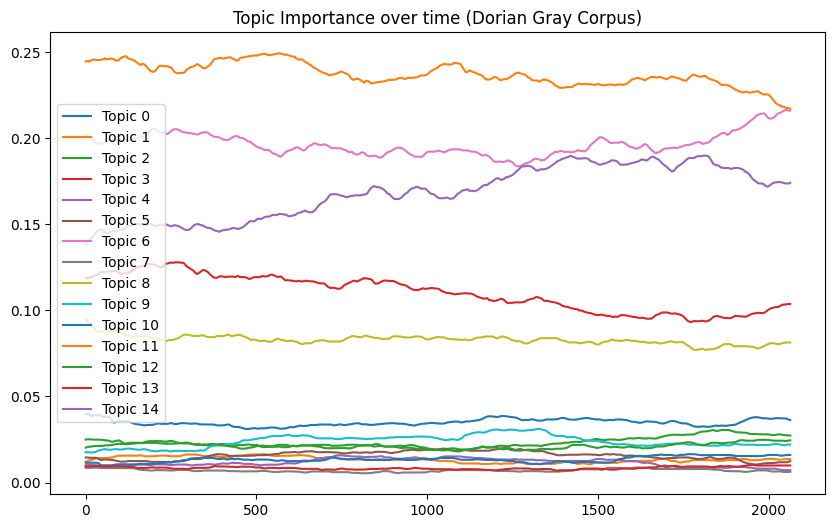

In [114]:
import numpy as np

x = np.arange(len(rolling_averages_dg_based[1]))

for topic_id, rolling_average in rolling_averages_dg_based.items():
    plt.plot(x, rolling_average, label=f'Topic {topic_id}')

plt.legend()
plt.title('Topic Importance over time (Dorian Gray Corpus)')
plt.show()

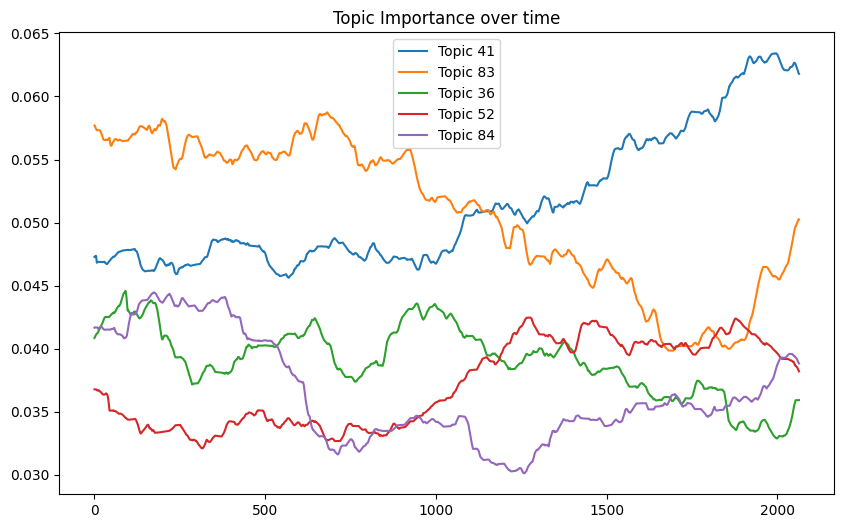

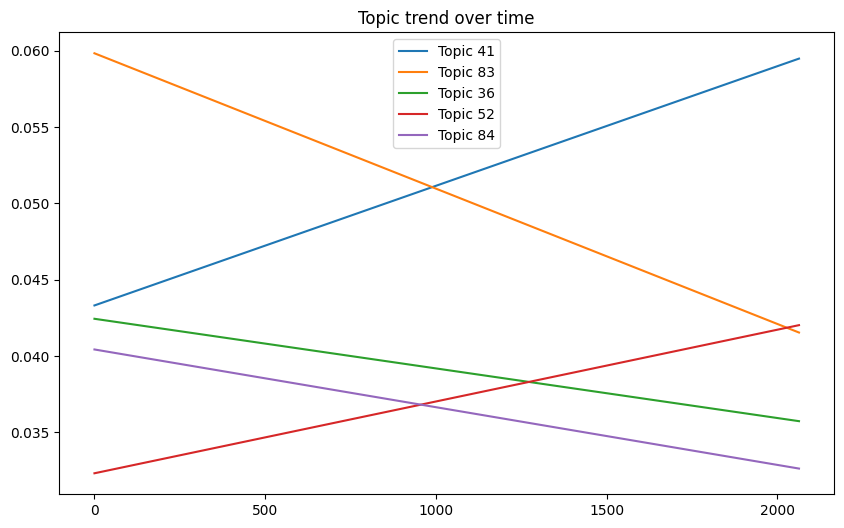

In [126]:
sorted_topics = sorted(rolling_averages_fc_based, key=lambda x: sum(rolling_averages_fc_based[x]), reverse=True)


for topic_id in sorted_topics[:5]:
    rolling_average = rolling_averages_fc_based[topic_id]
    plt.plot(x, rolling_average, label=f'Topic {topic_id}')

plt.legend()
plt.title('Topic Importance over time')
plt.savefig('dg-topics.png')
plt.show()


for topic_id in sorted_topics[:5]:
    rolling_average = rolling_averages_fc_based[topic_id]
    slope, intercept = np.polyfit(x, rolling_average, 1)
    plt.plot(x, slope*x + intercept, label=f'Topic {topic_id}')

plt.legend()
plt.title('Topic trend over time')
plt.show()

In [128]:
for key in sorted_topics[:5]:
    print(f'Topic {key}: {[word for word, score in lda_model_full_corpus.show_topic(key, topn=15)]}')

Topic 41: ['time', 'feeling', 'evening', 'sort', 'minute', 'master', 'month', 'story', 'society', 'mere', 'gain', 'conscious', 'sorrow', 'terror', 'escape']
Topic 83: ['life', 'sense', 'live', 'reason', 'lose', 'form', 'beauty', 'age', 'create', 'beautiful', 'demean', 'honoured', 'commendable', 'concerned', 'beneficence']
Topic 36: ['feel', 'gold', 'hair', 'trust', 'lip', 'handsome', 'blue', 'youth', 'worship', 'scarlet', 'wonderfully', 'concerned', 'bounty', 'disagreement', 'commendable']
Topic 52: ['speak', 'eye', 'care', 'heart', 'intend', 'guess', 'curious', 'heal', 'concerned', 'demean', 'disagreement', 'disrespectful', 'bounty', 'ladyship', 'occasional']
Topic 84: ['marry', 'wife', 'meet', 'marriage', 'laugh', 'party', 'forget', 'charm', 'dine', 'absurd', 'hospitality', 'scruple', 'honoured', '15th', 'heal']


In [117]:
mention_corpus_dorian_gray_based[1] == mention_corpus_dorian_gray_based[2]

False

In [120]:
lda_model_full_corpus.save('full_corpus_lda')

In [121]:
full_corpus_id2word.save('full_corpus_dictionary')